Support Vector Machines (SVM) and K-Nearest Neighbors (KNN) using Plurality  prediction

Accuracy: 0.5871559633027523
Precision: 0.5810637426243724
Recall: 0.5871559633027523
F1 Score: 0.5714220816994732
AUC: 0.6480841492125918
V Score: 0.36421926620889195


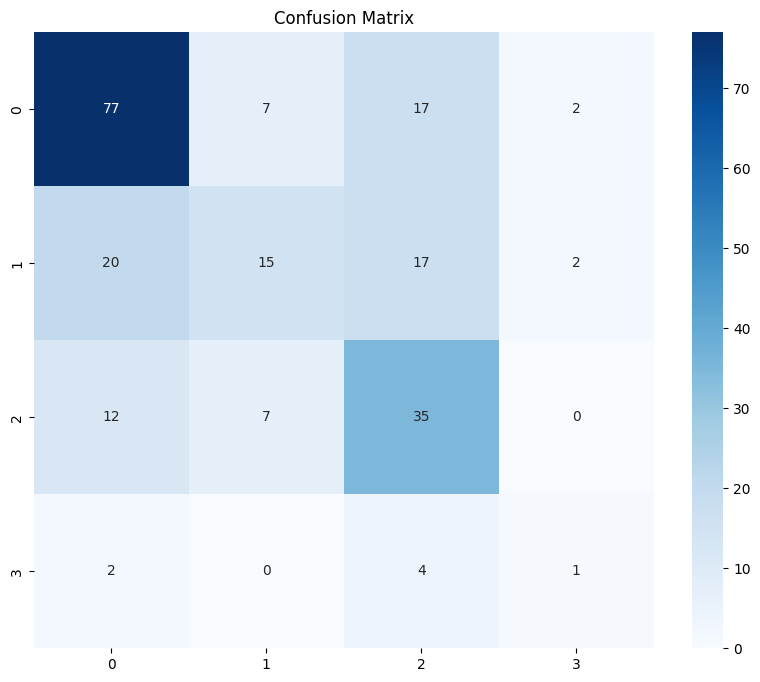

In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\dataset_NoPCA.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the individual classifiers
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Make predictions using the individual classifiers
svm_pred = svm_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

# Perform Plurality Prediction
pred = []
for i in range(len(X_test)):
    votes = [svm_pred[i], knn_pred[i]]  # List of predictions from individual classifiers
    pred.append(max(set(votes), key=votes.count))  # Select the most frequent prediction

# Calculate accuracy, precision, recall, F1 score, AUC, and V score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
auc = roc_auc_score(pd.get_dummies(y_test).values, pd.get_dummies(pred).values, multi_class='ovr')
v_score = matthews_corrcoef(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)

# Calculate and visualize the confusion matrix
confusion_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()
